# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | This was my first time flyin...
1,✅ Trip Verified | Lots of cancellations and d...
2,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...
3,✅ Trip Verified | Not only my first flight in...
4,✅ Trip Verified | My husband and myself were ...


In [ ]:
import os

if not os.path.exists("data"):
  os.mkdir("data")

print(os.getcwd())

/content


In [ ]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
!pip install stop-words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32910 sha256=37fb82ee1aad3ed2e5a296d74a0b45cc210208083946e737bb73b091ef75c537
  Stored in directory: /root/.cache/pip/wheels/eb/03/0d/3bd31c983789aeb0b4d5e2ca48590288d9db1586cf5f225062
Successfully built stop-words


In [ ]:
import string   # we need it for Punctuations removal
import nltk
from nltk.tokenize import word_tokenize # it turn text to list but more faster 
from stop_words import get_stop_words   # or we can use from nltk.corpus import stopwords 
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# preprocessing function for sentiment analysis
def sentiment_clean_text(text):
    '''
    this function take text and clean it  

    Parameters
    ----------
    text : string before preprocessing.

    Returns
    -------
    text : string after preprocessing.

    '''


    # A. first step remove useless text data (if there are any) note: i don't need data before | so I will remove it 
    if '|' in text:
        text =  text.split('|')[1]   
       
    # B. second turn letters into lowercase 
    text = text.lower()
        
    # C. third remove all Punctuations.
    text = text.translate(str.maketrans('','',string.punctuation))
    
    return text

In [ ]:
# preprocessing function for emotion analysis
def emotion_clean_text(text):
    '''
    this function take text and clean it then turn it to list of words 

    Parameters
    ----------
    text : string 

    Returns
    -------
    text_list : list of text words after cleaning.

    '''
        
    # D. forth step Tokenization and stop words 
        
    # Tokenizaiton: turning string into list of words.
    # Stop words: words without meaning for sentiment analysis.

        
    # Tokenizaiton
    text = word_tokenize(text,"english")
    
    # handeling the stop words but what are the stop words 
    stop_words = get_stop_words('english') #or we can use stop_words = stopwords.words('english')

    # Removing stop words from the tokenized words list
    text_list = []
    
    for word in text:
        if word not in stop_words:
            text_list.append(word)

       
    # return the list of words
    return text_list

## Emotion text dectionary function

now it's time to make dictionary function for emotions

In [ ]:
def emotion_maping (file,di): 
    '''
    this function take emotions file and store emotions in dictionary 

    Parameters
    ----------
    file : emotions file  

    Returns
    -------
    di : emotions dictionary.
    
    '''
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        di[word] = emotion
            
    return di

## Vader Sentiment analysis function


Now we have cleaned data so we are ready to do sentiment analysis

In [ ]:
# let's import the needed packages 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# function to carry out the     
def sentiment_analyze(text):
    
    scores = SentimentIntensityAnalyzer().polarity_scores(text) # return dictionary of scores
    
    if (scores['neg'] > scores['pos']):
        
        return 0
    
    else:
        return 1

## Main Section


apply functions to the dataset texts

In [ ]:
# define needed data structures
cleaned_text = ""
temp_emotion_list = []
score = 0
emotion_dict = {}
words_score_dict = {}
moods_list_st = []
moods_list_tp = []

# create category list for better understanding 
airline_main_categories = ['flight','service','seat','food','crew','time','good','class','cabin','seats','staff','business']
temp_category_list = []

# get the emotion dictionary ready
emotion_file = open('/content/emotion.txt','r',encoding='utf-8') 
emotion_dict = emotion_maping(emotion_file,emotion_dict)
emotion_file.close()


In [ ]:
# ------------------------ loop for the skytrx Dataframe ------------------------------

# loop for all reviews in Skytrax dataFrame  
for i in range(len(df)):
    
    # get the review of index i
    text = str(df['reviews'][i])
    
    # step 1: let's clean the text and assign cleaned list to dataFrame 
    # simple clean 
    cleaned_text= sentiment_clean_text(text)
    
    #Step 2: sentiment Analysis
    score = sentiment_analyze(cleaned_text)
    moods_list_st.append(score)

    
    # Step 3: advanced clean for emotions
    cleaned_text_list = emotion_clean_text(cleaned_text)
    df['reviews'][i] = cleaned_text_list
    

    # Step 4: emotion list builder
    for word in emotion_dict.keys():
        if word in cleaned_text_list:
            temp_emotion_list.append(emotion_dict[word])   
    
    # Step 5: category list builder
    for cat in airline_main_categories:
        if cat in cleaned_text_list:
            temp_category_list.append(cat)  

# now let's create new column for moods for skytrax
df['mood'] = moods_list_st


## Plot findings


now it's the time to create plots and show findings

# Plot for Vader Sentiment Scores

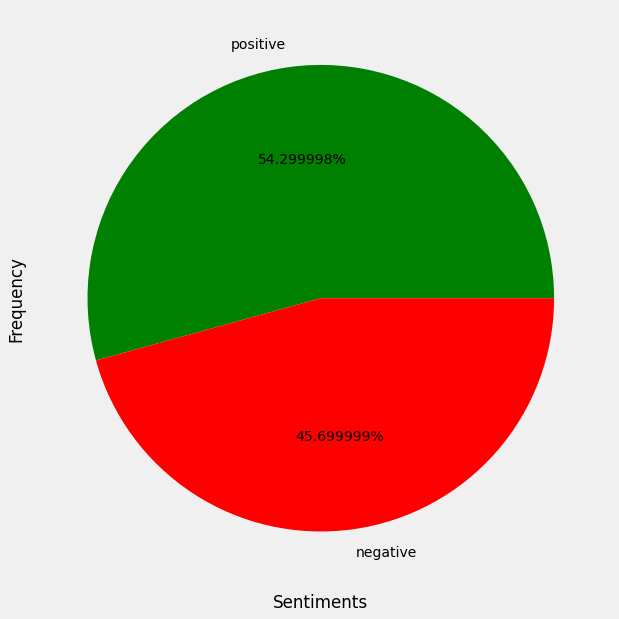

In [ ]:
from collections import Counter

# Step 5: plot sentiment and emotions 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


# get summary dictionary for sentiment 
moods_list = moods_list_st
mood_summary = dict(Counter(moods_list))

# rename dictionary keys before ploting 
mood_summary['positive'] = mood_summary.pop(1)
mood_summary['negative'] = mood_summary.pop(0)

colors = ['green', 'red']
fig, ax = plt.subplots()
#ax.bar(mmod_summary.keys(), mmod_summary.values())
ax.pie( mood_summary.values(), labels = mood_summary.keys(), autopct='%.6f%%', colors = colors)

# change the width and length of plot 
fig.set_figwidth(10)
fig.set_figheight(10)

# label the plot 
plt.xlabel('Sentiments')
plt.ylabel('Frequency')
#plt.savefig('Sentiments.png')
plt.show()

## Plot for Frequent Emotions

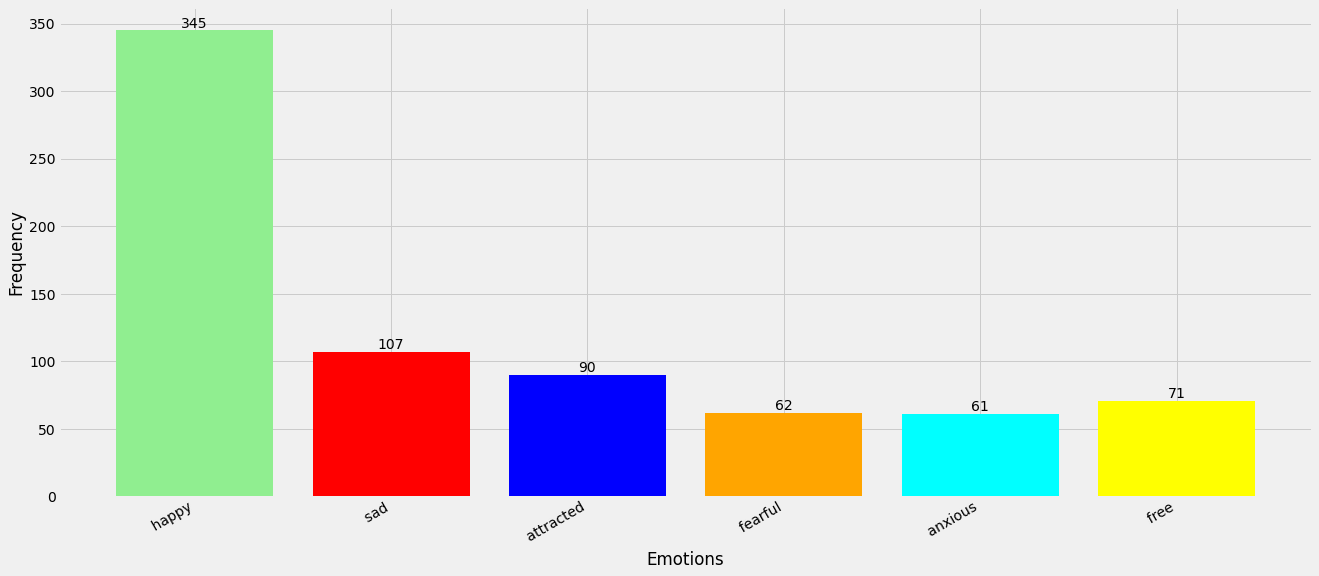

In [ ]:
# turn the emotion list into dictionary 
words_score_dict = dict(Counter(temp_emotion_list))

# now let's go more Specifically and just choose emotions with freq more than 20
more_than_20_emotions = dict( (key, value) for (key, value) in words_score_dict.items() if value > 50 )

colors = ['lightgreen', 'red', 'blue','orange','cyan', 'yellow']
fig, ax = plt.subplots()
bar_plot = ax.bar(more_than_20_emotions.keys(), more_than_20_emotions.values(), color = colors)

# the fit the text undre graph 
fig.autofmt_xdate()

# change the width and length of plot 
fig.set_figwidth(20)
fig.set_figheight(10)

# label the plot 
plt.xlabel('Emotions')
plt.ylabel('Frequency')

# add values on top of bars
for rect in bar_plot:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,
            '%d' % int(height), ha='center', va='bottom')

#save the graph and show it 
#plt.savefig('more_than_20_emotions.png')
plt.show()

## Word Cloud for Emotions

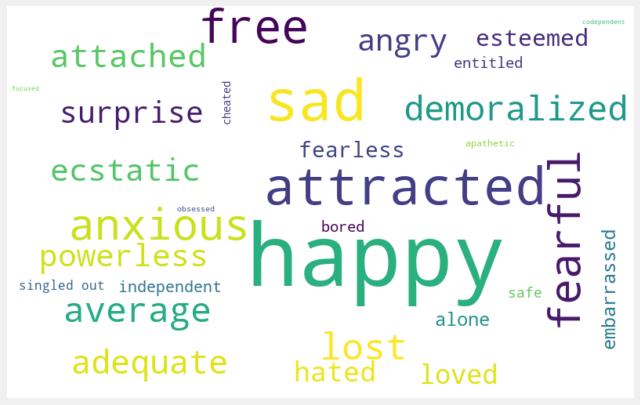

In [ ]:
from wordcloud import WordCloud 

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(words_score_dict) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

## Plot For Frequent Categories

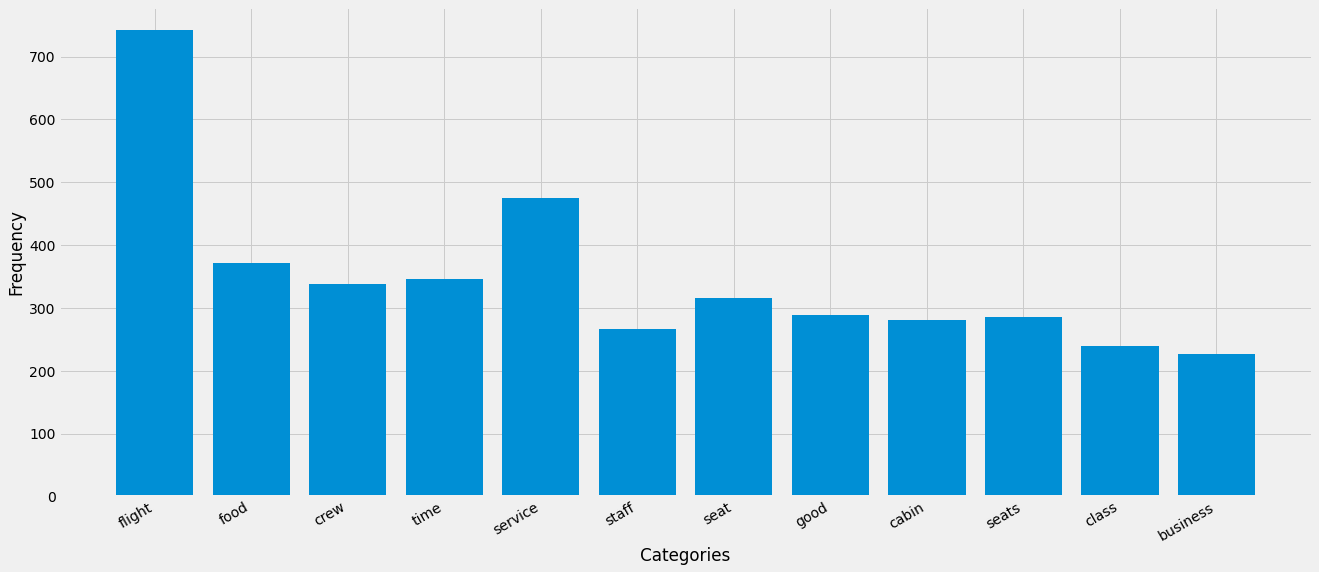

In [ ]:
# turn the emotion list into dictionary 
cat_score_dict = dict(Counter(temp_category_list))

# now let's go more Specifically and just choose emotions with freq more than 10
more_than_10_cat = dict( (key, value) for (key, value) in cat_score_dict.items() if value > 10 )


fig, ax = plt.subplots()
ax.bar(more_than_10_cat.keys(), more_than_10_cat.values())

# the fit the text undre graph 
fig.autofmt_xdate()

# change the width and length of plot 
fig.set_figwidth(20)
fig.set_figheight(10)

# label the plot 
plt.xlabel('Categories')
plt.ylabel('Frequency')

#save the graph and show it 
#plt.savefig('More_than_10_categories.png')
plt.show()

##Word Cloud for Categories

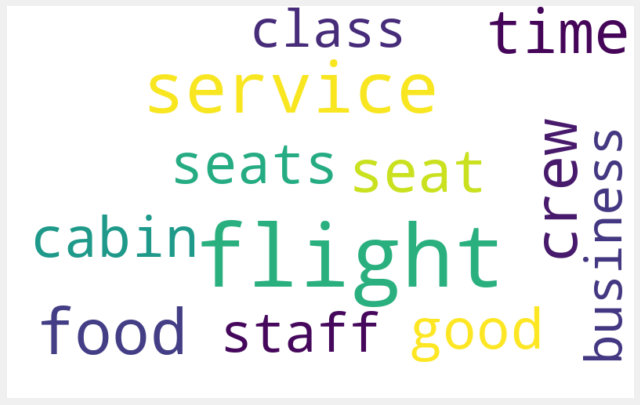

In [ ]:
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(cat_score_dict) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()